In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import nltk


In [3]:
pip install -U textblob


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordCloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob
from wordcloud import wordcloud
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to C:\Users\SUMEDH
[nltk_data]     LIKHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SUMEDH
[nltk_data]     LIKHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:

df = pd.read_csv("D:/EXCELR/Assignments/Elon_musk.csv",encoding="latin-1")
df


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
df["Text"]


0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [10]:
stp_words = stopwords.words("english")
stp_words 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
#sentimental analysis 
# cleaning the tweets

one_tweet = df.iloc[5]['Text']
one_tweet


'Happy New Year of the Ox! https://t.co/9WFKMYu2oj'

In [12]:
def TweetCleaning(tweets):
    Cleantweet=re.sub(r"@[a-zA-Z0-9]+"," ",tweets)
    Cleantweet=re.sub(r"#[a-zA-Z0-9]+"," ",Cleantweet)
    Cleantweet=''.join(word for word in Cleantweet.split() if word not in stp_words)
    return Cleantweet

In [13]:
def calPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

def calSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

def segmentation(tweets):
    if tweets > 0:
        return "positive"
    elif tweets == 0:
        return "neutral"
    else:
        return "negative"


In [14]:
df["Cleanedtweets"]=df["Text"].apply(TweetCleaning)
df["polarity"]=df["Cleanedtweets"].apply(calPolarity)
df["subjectivity"]=df["Cleanedtweets"].apply(calSubjectivity)
df["segmentation"]=df["polarity"].apply(segmentation)


In [15]:
pd.set_option("display.max_columns",6)
df.head()

,Unnamed: 0,Text,Cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral
3,4,@gtera27 Doge is underestimated,Dogeunderestimated,0.0,0.0,neutral
4,5,@teslacn Congratulations Tesla China for amazi...,CongratulationsTeslaChinaamazingexecutionlasty...,0.0,0.0,neutral


In [16]:
#Analysis and visualization 

df.pivot_table(index=['segmentation'],aggfunc={"segmentation":'count'})

# The positive tweets are 82

# The negative tweets are 3

# The neutral tweets are 1914


,segmentation
segmentation,
negative,3
neutral,1914
positive,82


In [17]:
# Top three positive tweets
df.sort_values(by=['polarity'],ascending=False).head(3)
 

,Unnamed: 0,Text,Cleanedtweets,polarity,subjectivity,segmentation
1594,1595,@Erdayastronaut Impressive,Impressive,1.0,1.0,positive
978,979,@lexfridman Nice,Nice,0.6,1.0,positive
1017,1018,@Carrenimfa Interesting,Interesting,0.5,0.5,positive


In [18]:
# Top three nagative tweets
df.sort_values(by=['polarity'],ascending=True).head(3)


,Unnamed: 0,Text,Cleanedtweets,polarity,subjectivity,segmentation
852,853,@flcnhvy @NASASpaceflight @Erdayastronaut Minor,Minor,-0.05,0.20,negative
417,418,@OLHZN Minor,Minor,-0.05,0.20,negative
741,742,@PPathole Strange,Strange,-0.05,0.15,negative


In [19]:
# Top three neutral tweets

df['polarity']==0
df[df['polarity']==0].head(3)

,Unnamed: 0,Text,Cleanedtweets,polarity,subjectivity,segmentation
0,1,@kunalb11 Im an alien,Imalien,0.0,0.0,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,_AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...,0.0,0.0,neutral
2,3,@joerogan @Spotify Great interview!,Greatinterview!,0.0,0.0,neutral


In [20]:
#Text Preprocessing
df["Cleanedtweets"]


0                                                Imalien
1       _AA_CarmackRaytracingCyberpunkHDRnext-level.Ha...
2                                         Greatinterview!
3                                      Dogeunderestimated
4       CongratulationsTeslaChinaamazingexecutionlasty...
                              ...                        
1994    True,soundssurreal,negativepropagandastill&amp...
1995    Makesurereadurterms&amp;conditionsclickingaccept!
1996                                        SamwiseGamgee
1997              AlthoDumbDumber<U+0001F525><U+0001F525>
1998                               ProgressupdateAugust28
Name: Cleanedtweets, Length: 1999, dtype: object

In [21]:
# Joining the list into one string/text

text = ' '.join(df["Cleanedtweets"])
text


'I\x92malien _AA_CarmackRaytracingCyberpunkHDRnext-level.Havetriedit? Greatinterview! Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyear.Nownextevenmore!! HappyNewYearOx!https://t.co/9WFKMYu2oj Frodounderdoge,Allthoughtwouldfail,Himselfall.https://t.co/zGxJFDzzrM _Hahathanks:) Indeed!Tweetsdefinitelyrepresentreal-worldtimeallocation. Theentertainingoutcomelikely Justsent JustagreeClubhouse https://t.co/3rWE9uHSTS It\x92sgettingreal BoughtDogecoinlilX,toddlerhodler Hedefinitelyissues,sentencingseemsbithigh Thanksfixing Pleaseunlockaccount <U+0001F923><U+0001F923> Thistruepowerhahahttps://t.co/Fc9uhQSd7O Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts Yourappsucks RT:NASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemission!https://t.co/3pWt Yes _Oncepredictcashflowreasonablywell,StarlinkIPO _Starlinkstaggeringlydifficulttechnical&amp;economicendeavor.However,https://t.co/9Z8Ac6skqx _SpaceXneedspassdeepchasmnegativecashflownextyearhttps://t.co/7J1c9

In [22]:
# punctuation
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text


'I\x92malien AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit Greatinterview Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore HappyNewYearOxhttpstco9WFKMYu2oj FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelyrepresentrealworldtimeallocation Theentertainingoutcomelikely Justsent JustagreeClubhouse httpstco3rWE9uHSTS It\x92sgettingreal BoughtDogecoinlilXtoddlerhodler Hedefinitelyissuessentencingseemsbithigh Thanksfixing Pleaseunlockaccount U0001F923U0001F923 ThistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts Yourappsucks RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt Yes OncepredictcashflowreasonablywellStarlinkIPO StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx SpaceXneedspassdeepchasmnegativecashflownextyearhttpstco7J1c92hdjl AACarmackLowestcostpertoncarbonsequesterednetvalueproductmadeMusts

In [23]:
# Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])


['I\x92malien', 'AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit', 'Greatinterview', 'Dogeunderestimated', 'CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore', 'HappyNewYearOxhttpstco9WFKMYu2oj', 'FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM', 'Hahathanks', 'IndeedTweetsdefinitelyrepresentrealworldtimeallocation', 'Theentertainingoutcomelikely', 'Justsent', 'JustagreeClubhouse', 'httpstco3rWE9uHSTS', 'It\x92sgettingreal', 'BoughtDogecoinlilXtoddlerhodler', 'Hedefinitelyissuessentencingseemsbithigh', 'Thanksfixing', 'Pleaseunlockaccount', 'U0001F923U0001F923', 'ThistruepowerhahahttpstcoFc9uhQSd7O', 'Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'Yourappsucks', 'RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt', 'Yes', 'OncepredictcashflowreasonablywellStarlinkIPO', 'StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx', 'SpaceXneedspassdeepchasmnegativecashflownextyearhttpst

In [24]:
# Removeing stopwords
my_stop_words = stopwords.words("english")


In [25]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
no_stop_tokens


['I\x92malien',
 'AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit',
 'Greatinterview',
 'Dogeunderestimated',
 'CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore',
 'HappyNewYearOxhttpstco9WFKMYu2oj',
 'FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM',
 'Hahathanks',
 'IndeedTweetsdefinitelyrepresentrealworldtimeallocation',
 'Theentertainingoutcomelikely',
 'Justsent',
 'JustagreeClubhouse',
 'httpstco3rWE9uHSTS',
 'It\x92sgettingreal',
 'BoughtDogecoinlilXtoddlerhodler',
 'Hedefinitelyissuessentencingseemsbithigh',
 'Thanksfixing',
 'Pleaseunlockaccount',
 'U0001F923U0001F923',
 'ThistruepowerhahahttpstcoFc9uhQSd7O',
 'Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts',
 'Yourappsucks',
 'RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt',
 'Yes',
 'OncepredictcashflowreasonablywellStarlinkIPO',
 'StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx',
 'SpaceXneedspassdeepchasmnega

In [26]:
# Normaliza the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:40])


['i\x92malien', 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit', 'greatinterview', 'dogeunderestimated', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmore', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'hahathanks', 'indeedtweetsdefinitelyrepresentrealworldtimeallocation', 'theentertainingoutcomelikely', 'justsent', 'justagreeclubhouse', 'httpstco3rwe9uhsts', 'it\x92sgettingreal', 'boughtdogecoinlilxtoddlerhodler', 'hedefinitelyissuessentencingseemsbithigh', 'thanksfixing', 'pleaseunlockaccount', 'u0001f923u0001f923', 'thistruepowerhahahttpstcofc9uhqsd7o', 'anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'yourappsucks', 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt', 'yes', 'oncepredictcashflowreasonablywellstarlinkipo', 'starlinkstaggeringlydifficulttechnicalampeconomicendeavorhoweverhttpstco9z8ac6skqx', 'spacexneedspassdeepchasmnegativecashflownextyearhttpst

In [27]:
# Stemming the data
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:10])


['i\x92malien', 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit', 'greatinterview', 'dogeunderestim', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmor', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'hahathank', 'indeedtweetsdefinitelyrepresentrealworldtimealloc', 'theentertainingoutcomelik']


In [30]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.2/12.2 MB 4.4 MB/s eta 0:00:00
     -------------------------------------- 482.8/482.8 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 4.7 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [33]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 4.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [35]:
# lemmas being one of them, but mostly POS, which whill will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Imalien AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit Greatinterview Dogeunderestimated CongratulationsTeslaChinaamazingexecutionlastyearNownextevenmore HappyNewYearOxhttpstco9WFKMYu2oj FrodounderdogeAllthoughtwouldfailHimselfallhttpstcozGxJFDzzrM Hahathanks IndeedTweetsdefinitelyrepresentrealworldtimeallocation Theentertainingoutcomelikely Justsent JustagreeClubhouse httpstco3rWE9uHSTS Itsgettingreal BoughtDogecoinlilXtoddlerhodler Hedefinitelyissuessentencingseemsbithigh Thanksfixing Pleaseunlockaccount U0001F923U0001F923 ThistruepowerhahahttpstcoFc9uhQSd7O Anycryptowalletwontgiveprivatekeysavoidedcosts Yourappsucks RTNASAselectedFalconHeavylaunchfirsttwoelementslunarGatewaytogetheronemissionhttpstco3pWt Yes OncepredictcashflowreasonablywellStarlinkIPO StarlinkstaggeringlydifficulttechnicalampeconomicendeavorHoweverhttpstco9Z8Ac6skqx SpaceXneedspassdeepchasmnegativecashflownextyearhttpstco7J1c92hdjl AACarmackLowestcostpertoncarbonsequesterednetvalueproductmadeMustscalableght

In [36]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])


['I\x92malien', 'AACarmackRaytracingCyberpunkHDRnextlevelHavetriedit', 'Greatinterview', 'dogeunderestimate', 'congratulationsteslachinaamazingexecutionlastyearnownextevenmore', 'happynewyearoxhttpstco9wfkmyu2oj', 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm', 'Hahathanks', 'IndeedTweetsdefinitelyrepresentrealworldtimeallocation', 'theentertainingoutcomelikely', 'Justsent', 'JustagreeClubhouse', 'httpstco3rWE9uHSTS', 'it\x92sgettingreal', 'BoughtDogecoinlilXtoddlerhodler', 'Hedefinitelyissuessentencingseemsbithigh', 'Thanksfixing', 'Pleaseunlockaccount', 'U0001F923U0001F923', 'ThistruepowerhahahttpstcoFc9uhQSd7O', 'Anycryptowalletwon\x92tgiveprivatekeysavoidedcosts', 'Yourappsucks', 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt', 'yes', 'oncepredictcashflowreasonablywellstarlinkipo']


In [37]:
#Feature Extraction  
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)


In [38]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

print(vectorizer.vocabulary_)


{'malien': 846, 'aacarmackraytracingcyberpunkhdrnextlevelhavetriedit': 41, 'greatinterview': 528, 'dogeunderestim': 344, 'congratulationsteslachinaamazingexecutionlastyearnownextevenmor': 298, 'happynewyearoxhttpstco9wfkmyu2oj': 558, 'frodounderdogeallthoughtwouldfailhimselfallhttpstcozgxjfdzzrm': 478, 'hahathank': 552, 'indeedtweetsdefinitelyrepresentrealworldtimealloc': 699, 'theentertainingoutcomelik': 1696, 'justsent': 763, 'justagreeclubhous': 754, 'httpstco3rwe9uhst': 603, 'it': 719, 'sgettingr': 1397, 'boughtdogecoinlilxtoddlerhodl': 225, 'hedefinitelyissuessentencingseemsbithigh': 570, 'thanksfix': 1665, 'pleaseunlockaccount': 1071, 'u0001f923u0001f923': 1896, 'thistruepowerhahahttpstcofc9uhqsd7o': 1778, 'anycryptowalletwon': 146, 'tgiveprivatekeysavoidedcost': 1660, 'yourappsuck': 2111, 'rtnasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemissionhttpstco3pwt': 1231, 'ye': 2053, 'oncepredictcashflowreasonablywellstarlinkipo': 1026, 'starlinkstaggeringlydifficu

In [39]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

print(X.toarray().shape)


['aacarmackyup', 'about2secsstartingenginesmartytecoveringconcreteshatteredsendingbladeshttpstcovilv1s16yo', 'above50likelymak', 'absolut', 'absolutelydoesn', 'absolutelylonglastingartincrediblydifficult', 'absolutelyproductiontestingrocketengines90httpstcotv3pixzp4i', 'absolutelytheyrocku0001f5a4', 'absolutelyu0001f603u0001f3dd', 'absolutelywereleasefsdsubscriptionearlynextyear', 'absolutelywilltextampvisualizationcouldaddvoicetoo', 'accur', 'accurateanalysisquiteegointelligencegtgt1peoplecommentthreadhahaneithermobileyehttpstcofdligohk01', 'acquisitionsignalexpected5min', 'actuallyit', 'actuallymatt', 'adagiostringsgreathttpstcorgy1p1vg', 'addictednoamppossiblescal', 'addingpeoplenextvers', 'additivemanufacturingpartsstillfarcostlycarsrapidlycreatetoolingaccelhttpstcoz9kxjt9umj', 'adritheresubtleimportantdifferencesusampcanadatrafficrulesbuhttpstcoxzx9ppvl92', 'adriy', 'africabig', 'afshariingeneralneedimprovepodcastsplay', 'after', 'afterdrivewithoutusingprndstalkstickdaysgetsannoyi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
# bigram and trigram

vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=(100))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(df["Cleanedtweets"])

bow_matrix_ngram 

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1992 stored elements in Compressed Sparse Row format>

In [41]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())


['0001f1e9', '0001f1e9 0001f1ea', '0001f1ea', '0001f339', '0001f3b6', '0001f440', '0001f44d', '0001f495', '0001f4af', '0001f525', '0001f525 0001f525', '0001f5a4', '0001f600', '0001f609', '0001f680', '0001f923', '0001f923 0001f923', '0435', '043b', '043e', '100', '200d', '2192', '2192 https', '2192 https co', '2660', '2660 fe0f', '26a1', '26a1 fe0f', '_enoughyes', 'absolutely', 'agreed', 'also', 'amp', 'amp https', 'amp https co', 'buhttps', 'buhttps co', 'but', 'can', 'co', 'comingsoon', 'cool', 'doesn', 'doge', 'don', 'exactly', 'falcon9', 'fe0f', 'forsure', 'goodanalysis', 'goodpoint', 'greatgame', 'gt', 'haha', 'hahatrue', 'hopefully', 'however', 'https', 'https co', 'indeed', 'it', 'liftoff', 'liftoff https', 'liftoff https co', 'long', 'lt', 'no', 'notbad', 'ok', 'prettymuch', 'rt', 'rt falcon9', 'rt https', 'rt https co', 'rt liftoff', 'rt liftoff https', 'rt_crew', 'shttps', 'shttps co', 'sigh', 'sorry', 'spacex', 'sure', 'technically', 'term', 'tesla', 'thankyou', 'that', 'the'

In [42]:
# TFidf vectorizer 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_range_max_features = TfidfVectorizer(analyzer="word",ngram_range=(1,3),max_features=10)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_range_max_features.fit_transform(df["Cleanedtweets"])


In [43]:
print(vectorizer_n_gram_range_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())


['0001f923', '0001f923 0001f923', 'amp', 'co', 'https', 'https co', 'it', 'rt', 'we', 'yes']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
# wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from wordcloud import WordCloud,STOPWORDS
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(15,30))
    plt.imshow(wordcloud)
    plt.axis("off");

In [46]:
wordcloud = WordCloud(width= 3000, height=2000, background_color="black", max_words=100, colormap="Set2").generate(text)


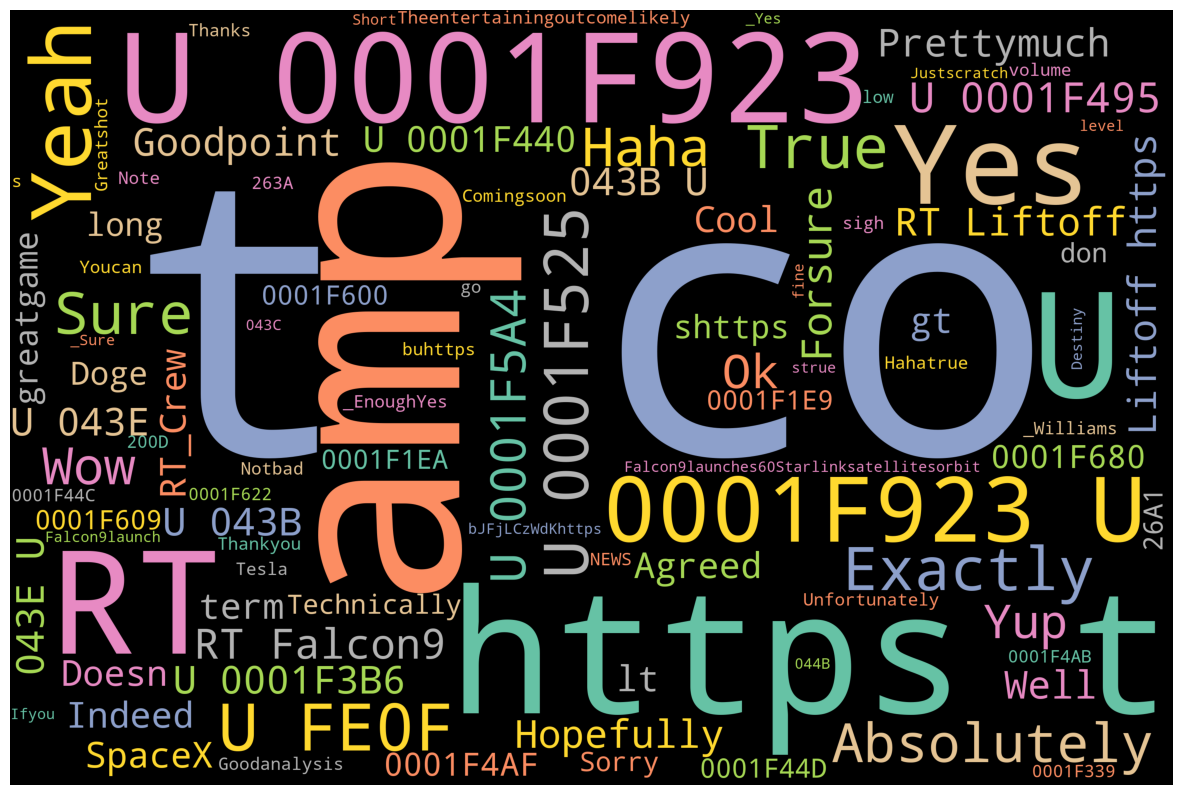

In [48]:
# plot
plot_cloud(wordcloud)